In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('liquid-crystal_data.csv')
data.set_index('Unnamed: 0', inplace=True)

### Data

In [ ]:
data.head(100)

,5LC,10LC,particles,5LC_particle,5LC_molecule,10LC_particle,10LC_molecule,N_molecule,Average,Disperse,product,STDEVP,devsq,skew,kurt,Temperature,Target
Unnamed: 0,,,,,,,,,,,,,,,,,
0,100,0,32000,32000,6400,0,0,6400,9612.5,1.986755e+08,0.000000e+00,13184.881257,1390728750,1.282111,-0.240628,1.0,0.011573
1,100,0,32000,32000,6400,0,0,6400,9612.5,1.986755e+08,0.000000e+00,13184.881257,1390728750,1.282111,-0.240628,0.9,0.012100
2,100,0,32000,32000,6400,0,0,6400,9612.5,1.986755e+08,0.000000e+00,13184.881257,1390728750,1.282111,-0.240628,0.8,0.011733
3,100,0,32000,32000,6400,0,0,6400,9612.5,1.986755e+08,0.000000e+00,13184.881257,1390728750,1.282111,-0.240628,0.7,0.011687
4,100,0,32000,32000,6400,0,0,6400,9612.5,1.986755e+08,0.000000e+00,13184.881257,1390728750,1.282111,-0.240628,0.6,0.012401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,45,55,32000,14400,2880,17600,1760,4640,9172.5,1.287098e+08,4.720886e+26,10612.307713,900968600,1.352543,1.230013,0.7,0.020089
114,45,55,32000,14400,2880,17600,1760,4640,9172.5,1.287098e+08,4.720886e+26,10612.307713,900968600,1.352543,1.230013,0.6,0.033490
115,45,55,32000,14400,2880,17600,1760,4640,9172.5,1.287098e+08,4.720886e+26,10612.307713,900968600,1.352543,1.230013,0.5,0.038378


In [4]:
parts = data['particles'].value_counts().index.sort_values()

In [5]:
parts

Int64Index([16000, 24000, 32000], dtype='int64')

In [6]:
key = data['5LC'].unique()

### The fixed number of particles

Temperature and % of 5LC are varaible.

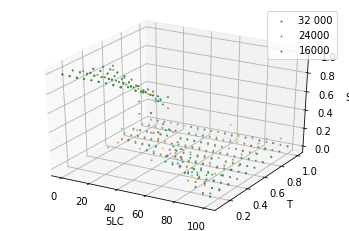

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
x1 = np.array(data[data.particles == 32000]['5LC'])
y1 = np.array(data[data.particles == 32000].Temperature)
z1 = np.array(data[data.particles == 32000].Target)
x2 = np.array(data[data.particles == 24000]['5LC'])
y2 = np.array(data[data.particles == 24000].Temperature)
z2 = np.array(data[data.particles == 24000].Target)
x3 = np.array(data[data.particles == 16000]['5LC'])
y3 = np.array(data[data.particles == 16000].Temperature)
z3 = np.array(data[data.particles == 16000].Target)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, label= '32 000',s = 1)
ax.scatter(x2, y2, z2, label='24000', s = 1)
ax.scatter(x3, y3, z3, label='16000', s = 1)
ax.set_xlabel('5LC')
ax.set_ylabel('T')
ax.set_zlabel('S')
ax.legend()


### The fixed Temperature (0.2, 0.7 and 1)

The whole number of particles and % of 5LC are varaible.

As we can see, for the high temperatures we really don't have the good order, but at the same time at low - we have.

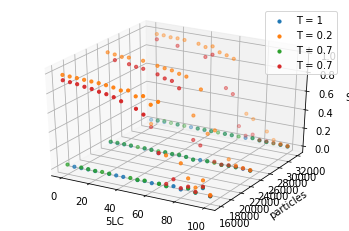

In [9]:

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
x1 = np.array(data[data.Temperature == 1]['5LC'])
y1 = np.array(data[data.Temperature == 1]['particles'])
z1 = np.array(data[data.Temperature == 1]['Target'])
x2 = np.array(data[data.Temperature == 0.2]['5LC'])
y2 = np.array(data[data.Temperature == 0.2]['particles'])
z2 = np.array(data[data.Temperature == 0.2]['Target'])
x3 = np.array(data[data.Temperature == 0.7]['5LC'])
y3 = np.array(data[data.Temperature == 0.7]['particles'])
z3 = np.array(data[data.Temperature == 0.7]['Target'])
x4 = np.array(data[data.Temperature == 0.3]['5LC'])
y4 = np.array(data[data.Temperature == 0.3]['particles'])
z4 = np.array(data[data.Temperature == 0.3]['Target'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, label= 'T = 1',s = 10)
ax.scatter(x2, y2, z2, label='T = 0.2', s = 10)
ax.scatter(x3, y3, z3, label='T = 0.7', s = 10)
ax.scatter(x4, y4, z4, label='T = 0.7', s = 10)
ax.set_xlabel('5LC')
ax.set_ylabel('particles')
ax.set_zlabel('S')
ax.legend()

In [10]:
%matplotlib inline
a = data.Temperature.value_counts().index

for key in a:
    data_s = data[data['Temperature'] == key]
    x1 = np.array(data_s['5LC'])
    y1 = np.array(data_s.particles)
    z1 = np.array(data_s.Target)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, label='parametric curve')


### Dependece of the S from T for different number of particles

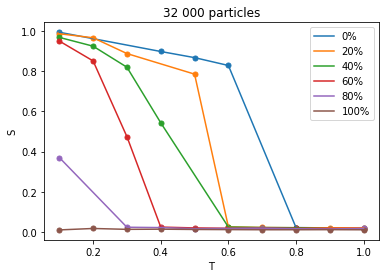

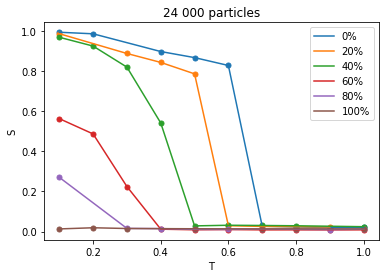

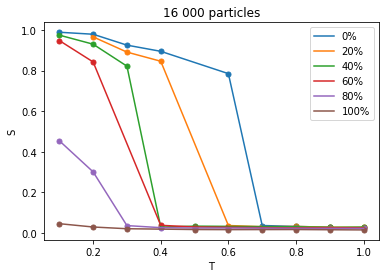

In [13]:
#fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(4, 4), \
#                        sharey=True, sharex=True)
x = []
y = []
key = np.arange(0,120,20)
#plt.subplot(221)
data_1 = data[data.particles == 32000]
data_2 = data[data.particles == 24000]
data_3 = data[data.particles == 16000]
for i in key:
  x = (data_1[data_1['5LC'] == i]['Temperature'])
  y = (data_1[data_1['5LC'] == i]['Target'])
  plt.plot(x,y, label = str(i)+'%' )
  plt.scatter(x,y,s =25)
plt.xlabel('T')
plt.ylabel('S')
plt.legend()
plt.title('32 000 particles')
plt.show()

#plt.subplot(222)
for i in key:
  x = (data_2[data_2['5LC'] == i]['Temperature'])
  y = (data_2[data_2['5LC'] == i]['Target'])
  plt.plot(x,y, label = str(i)+'%' )
  plt.scatter(x,y,s =25)
plt.title('32 000 particles')
plt.xlabel('T')
plt.ylabel('S')
plt.legend()
plt.title('24 000 particles')
plt.show()

for i in key:
  x = (data_3[data_3['5LC'] == i]['Temperature'])
  y = (data_3[data_3['5LC'] == i]['Target'])
  plt.plot(x,y, label = str(i)+'%' )
  
  plt.scatter(x,y,s =25)
plt.title('16 000 particles')
plt.xlabel('T')
plt.ylabel('S')
plt.legend()
plt.show()

### Regression model

As the regression model - using Gradient Boosting Regressor for independent variables % of LC, whole number of particles and Temperature.

In [20]:
data_new = pd.DataFrame({'5LC': data['5LC'], 'Temperature': data['Temperature'], 'particles':data['particles']})
Y = data.Target

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
a = np.array(data_new.Temperature).reshape(-1,1)
scaler.fit(a)
data_new['Temperature'] = scaler.transform(a)
scaler.fit(np.array(data_new['5LC']).reshape(-1,1))
data_new['5LC'] = scaler.transform(np.array(data_new['5LC']).reshape(-1,1))

In [ ]:
data_new

,5LC,Temperature,particles
Unnamed: 0,,,
0,1.0,1.000000,32000
1,1.0,0.888889,32000
2,1.0,0.777778,32000
3,1.0,0.666667,32000
4,1.0,0.555556,32000
...,...,...,...
624,0.0,0.555556,16000
626,0.0,0.333333,16000
627,0.0,0.222222,16000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_new, Y, test_size=0.25, random_state = 42, shuffle = True)

In [25]:
from sklearn import ensemble 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbt = GradientBoostingRegressor()

In [ ]:
params_grid = {
    'n_estimators': np.arange(25,200, 25),
    'learning_rate': np.arange(0.1,1,0.2),
    'max_depth': np.arange(3,15)
}

In [ ]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
gs = GridSearchCV(gbt, param_grid = params_grid, cv = cv, n_jobs = -1, verbose = 1)

In [ ]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weigh...
                                                 random_state=None,
                                             

In [ ]:
gs.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 4, 'n_estimators': 75}

### The best parametrs for GBR:

'learning_rate': 0.3

'max_depth': 4

'n_estimators': 75

In [ ]:
y_pred_tr = gs.best_estimator_.predict(X_train)
y_pred_test = gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print(r2(y_train, y_pred_tr))
print(mse(y_train, y_pred_tr))

0.9941159954574627
0.0007798932289133846


In [ ]:
print(r2(y_test, y_pred_test))
print(mse(y_test, y_pred_test))

0.9842133357029409
0.002630323131592229


### Score and MSE

As the result we have results:

#### TRAIN:

MSE: 0.00077

R2: 0.994

#### TEST:

MSE: 0.0026

R2: 0.984

### Real test data

In [37]:
data_test = pd.read_csv('liquid-crystal_pred.csv')
data_test.set_index('Unnamed: 0')

,5LC,10LC,particles,5LC_particle,5LC_molecule,10LC_particle,10LC_molecule,N_molecule,Average,Disperse,product,STDEVP,devsq,skew,kurt,Temperature
Unnamed: 0,,,,,,,,,,,,,,,,
426,100,0,16000,16000,3200,0,0,3200,4812.5,4.960125e+07,0.000000e+00,6587.950649,347208750,1.283016,-0.239073,0.4
222,95,5,24000,22800,4560,1200,120,4680,7182.5,1.038990e+08,7.987537e+23,9534.758780,727293000,1.302117,-0.183062,0.8
351,30,70,24000,7200,1440,16800,1680,3120,6792.5,7.937311e+07,4.601492e+25,8333.754781,555611750,1.386619,0.733860,0.9
613,5,95,16000,800,160,15200,1520,1680,4432.5,4.795300e+07,3.775896e+22,6477.567059,335671000,1.408964,-0.021238,0.7
36,85,15,32000,27200,5440,4800,480,5920,9492.5,1.615568e+08,8.234404e+25,11889.582625,1130897400,1.328570,0.070182,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,10,90,24000,2400,480,21600,2160,2640,6672.5,1.005737e+08,3.064910e+24,9380.936454,704015750,1.411621,0.053155,0.3
107,50,50,32000,16000,3200,16000,1600,4800,9212.5,1.275548e+08,5.033165e+26,10564.585593,892883750,1.345393,1.274843,0.3
157,25,75,32000,8000,1600,24000,2400,4000,9012.5,1.483607e+08,1.769472e+26,11393.666004,1038525000,1.396669,0.523153,0.3


In [38]:
data_new_test = pd.DataFrame({'5LC': data_test['5LC'],'particles': data_test['particles'],'Temperature': data_test['Temperature'] })

In [39]:
data_new_test

,5LC,particles,Temperature
0,100,16000,0.4
1,95,24000,0.8
2,30,24000,0.9
3,5,16000,0.7
4,85,32000,0.4
...,...,...,...
95,10,24000,0.3
96,50,32000,0.3
97,25,32000,0.3
98,5,24000,0.5


In [ ]:
y_test_pred = gs.best_estimator_.predict(data_new_test)

In [ ]:
y_test_pred = pd.DataFrame(y_test_pred, columns = ['S'])

In [ ]:
y_test_pred

,S
0,0.017079
1,0.017079
2,0.017079
3,0.017079
4,0.017079
...,...
95,0.017079
96,0.017079
97,0.017079
98,0.017079


In [ ]:
y_test_pred.to_csv('predicted S (regression)')

### Classification model

In [14]:
 from sklearn.ensemble import GradientBoostingClassifier

In [26]:
classs = []
y = np.array(Y)
s_p = 0.5
for i in range (data_new.shape[0]):
  if y[i] > s_p:
    classs.append(1)
  else:
    classs.append(0)
Y_class = classs

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_new, Y_class, test_size=0.25, random_state = 42)

In [28]:
gbt_class = GradientBoostingClassifier()
params_grid_class = {
    'n_estimators': np.arange(25,200, 25),
    'learning_rate': np.arange(0.1,1,0.2),
    'max_depth': np.arange(3,15)
}
cv_c = KFold(n_splits = 5, shuffle = True, random_state = 42)
gs_c = GridSearchCV(gbt_class, param_grid = params_grid_class, cv = cv_c, n_jobs = -1, verbose = 1)

In [29]:
gs_c.fit(X_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 1546 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  1.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_f...
                                                  random_state=None,
                                   

In [30]:
gs_c.best_params_

{'learning_rate': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 25}

### Best parametrs for the Gradient Boosting Classifier:

'learning_rate': 0.7

'max_depth': 4

'n_estimators': 25

In [31]:
y_pred_tr = gs_c.best_estimator_.predict(X_train)
y_pred_test = gs_c.best_estimator_.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_tr ))
print(accuracy_score(y_test,y_pred_test))

1.0
0.9774436090225563


In [55]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train,y_pred_tr ))
print(mse(y_test,y_pred_test))

0.0
0.022556390977443608


### Accuracy and MSE:

As the result we have accuracy score about 0.97 and MSE = 0.023

In [ ]:
y_t = np.array(y_t)

In [42]:
data_new_test

,5LC,particles,Temperature
0,100,16000,0.4
1,95,24000,0.8
2,30,24000,0.9
3,5,16000,0.7
4,85,32000,0.4
...,...,...,...
95,10,24000,0.3
96,50,32000,0.3
97,25,32000,0.3
98,5,24000,0.5


In [43]:
y_pred = gs_c.best_estimator_.predict(data_new_test)

In [48]:
data_new_test['predicted_s'] = y_pred

In [49]:
data_new_test['predicted_s'].value_counts()

0    100
Name: predicted_s, dtype: int64

Writing the results into a file.

In [50]:
data_new_test.to_csv('predicted S (class)')